<a href="https://colab.research.google.com/github/royus7/GuilfordPhysics/blob/main/NowatkaPHYSThesisPersonalDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thesis Rope Stretch


# Rope length

approx height of:

Weight Pin + Carabiner = 50 cm

Linescale + slings + Carabiners = 50 cm

Rail to floor = 285 cm

padding (just in case) = 10 cm

This leaves 175 cm for rope and stretch

Rope stretches up to 40% under load.

so 175 cm > 140% of rope length

rope length must be: **125 cm or less**

$\frac{125}{175} ≈ \frac{100}{140} $


125 cm (5 cm margin for error.)

= 120 cm test length

$+$ approx knot lenght= 62 cm (x2 bc one for each end)

$+$ 10 cm tail minimum after each knot (x2, one for each end)

$+$  15 cm loop x2

= 260 cm

approx 2.6m lenght per sample before knots.




knot + tail = 70 + cm untied rope lenght

lenght of a tied knot + loop = 12 cm

125cm -  24cm (2x tied knot length) = 100 cm sample length



## Marking Rope samples for consistent knots

Side A:
- 10 cm (min tail length)
- 34 cm (24 cm for knot)
- 46 cm (12 cm for loop)
- 70 cm (24 cm for knot)

Sample:
- sample lenght 100 cm
- 170 cm (100 cm test lenght)

Side B:
- 194 cm (24 cm knot) 24
- 206 cm (12 cm loop) 36
- 230 cm (24 cm knot) 60
- 240 cm (tail mark)
- 250 + cm = total lenght


## Cutting Rope

used vernier dual range force sensor to measure green rope into 250 cm lengths.

pulled to 25 N

Relaxes, Held steady at 15 N



# Imports:

In [53]:
import numpy as np # math functions
import matplotlib.pyplot as plt #graphing
from matplotlib import ticker

import scipy.stats as ss # stats
from scipy.stats import norm

from scipy.signal import argrelextrema # finds min and maxes in data
from scipy.signal import find_peaks
import scipy
import pandas as pd #CSV data program
import pylab as pl

from scipy.optimize.minpack import curve_fit

import random
import os


print('Pandas Version',pd.__version__) # prints version of pandas
#1.3.5 on December 16, 2022

#print('Matplotlib Version',plt.__version__) # prints version of pandas


Pandas Version 1.5.3


<ipython-input-53-abfd8197610f>:14: DeprecationWarning: Please use `curve_fit` from the `scipy.optimize` namespace, the `scipy.optimize.minpack` namespace is deprecated.
  from scipy.optimize.minpack import curve_fit


In [2]:
#import and mount google drive
from google.colab import files

from google.colab import drive #accesses whole google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
def peakfinder(peakcolumn):
  peak, peakheights = find_peaks(peakcolumn, height=0)
  ph  = peakheights['peak_heights']
  Peaks = pd.DataFrame(list(zip(peak, ph)), columns=['Peak','PeakHeight'])
  return(Peaks)
  peakfinder()

In [4]:
# I have defined a function that allows you to put in set a dataframe =driveSheetToDF(Sheet_id, Sheet_Name) and it will return a df
def driveSheetToDF(Sheet_id, Sheet_Name):
  Sheet_url = f"https://docs.google.com/spreadsheets/d/{Sheet_id}/gviz/tq?tqx=out:csv&sheet={Sheet_Name}"
  New_df_name = pd.read_csv(Sheet_url)
  return(New_df_name)
  driveSheetToDF()

In [5]:
''' quotes commment out several lines at once
#Gspread library used by Medium article
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
'''

' quotes commment out several lines at once\n#Gspread library used by Medium article\nfrom google.colab import auth\nauth.authenticate_user()\nimport gspread\nfrom oauth2client.client import GoogleCredentials\ngc = gspread.authorize(GoogleCredentials.get_application_default())\n'

# Data from google sheets

In [6]:
sheet_id = "1DNLI5p4k-HZ30AP-HhXas28KBRYAMNCg7HX3UOk3cMQ"

sheet_name = "PureData"

AllRopedf = driveSheetToDF(sheet_id, sheet_name)
AllRopedf.head(10)

,SampleName,Date,Time1,Drop_kN1,Time2,Drop_kN2,time_dif,T_Diff_Sec,T_Diff_Uncert,kN_diff,kN_diff_uncert
0,G16,11.19.2023,22:53:49,3.74,22:55:30,4.49,0:01:41,101,2,0.75,0.02
1,Y13,11.21.2023,19:07:13,3.78,19:08:55,4.50,0:01:42,102,2,0.72,0.02
2,G13,11.19.2023,19:14:28,3.73,19:16:20,4.38,0:01:52,112,2,0.65,0.02
3,G12,11.19.2023,18:59:14,3.80,19:01:16,4.40,0:02:02,122,2,0.60,0.02
4,G11,11.19.2023,18:37:31,3.68,18:40:01,4.38,0:02:30,150,2,0.70,0.02
5,G10,11.19.2023,18:18:15,3.74,18:20:54,4.47,0:02:39,159,2,0.73,0.02
6,G09,11.19.2023,18:02:59,3.72,18:07:59,4.39,0:05:00,300,2,0.67,0.02
7,G17,11.19.2023,23:17:22,3.78,23:22:22,4.40,0:05:00,300,2,0.62,0.02
8,R05,11.12.2023,21:41:12,3.81,21:46:12,4.64,0:05:00,300,2,0.83,0.02
9,R04,11.12.2023,21:30:50,3.86,21:35:51,4.51,0:05:01,301,2,0.65,0.02


In [7]:
GreenRopedf = driveSheetToDF(sheet_id, "GreenPureData")


In [8]:
RedRopedf = driveSheetToDF(sheet_id, "RedPureData")

In [9]:
YellowRopedf = driveSheetToDF(sheet_id, "YellowPureData")

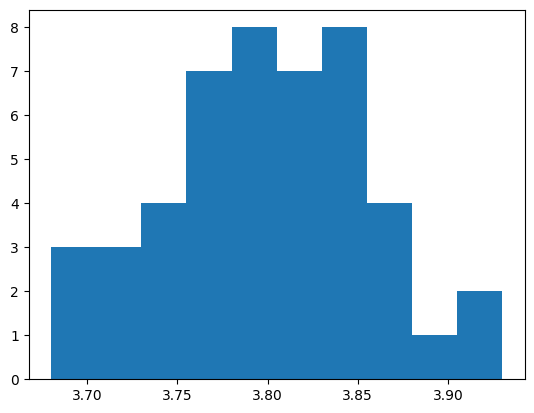

In [10]:
histalldat = plt.hist(AllRopedf['Drop_kN1'])
#check out chi squared goodness of fit.

In [11]:
#R^2 / goodness of fit


In [12]:
#copied from documentation
Rsquarex =AllRopedf['Drop_kN1']
rng = np.random.default_rng()
loc, scale = np.mean(Rsquarex), np.std(Rsquarex, ddof=1)
known_params = {'loc': loc, 'scale': scale}
res_alldat = ss.goodness_of_fit(ss.norm, AllRopedf['Drop_kN1'], known_params=known_params, statistic='ks', random_state=rng)
res_alldat.statistic, res_alldat.pvalue

(0.12992487111266315, 0.3707)

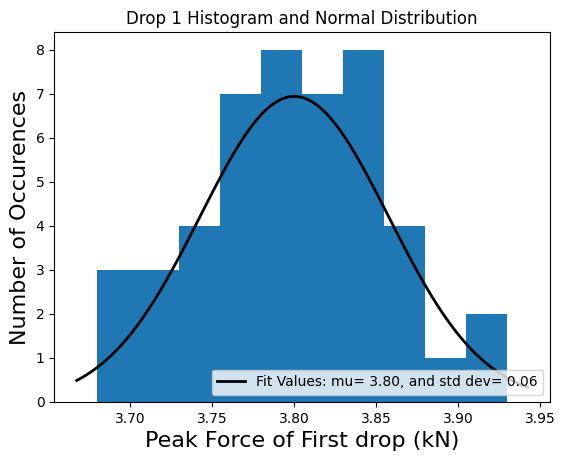

In [13]:
fig, ax = plt.subplots()
txt = 'black'
#mu, std = norm.fit(data)
mu, std = norm.fit(AllRopedf['Drop_kN1'])

#plt.hist(data, bins=25, density=True, alpha=0.6, color='b')# Plot the histogram.
p1 = plt.hist(AllRopedf['Drop_kN1'])# Plot the histogram.

# Plot the PDF.
xmin, xmax = plt.xlim()
Curvex = np.linspace(xmin, xmax, 100)
p = norm.pdf(Curvex, mu, std)

p2 = plt.plot(Curvex, p, 'k', linewidth=2, label = 'Fit Values: mu= {:.2f}, and std dev= {:.2f}'.format(mu, std)) # Plot the PDF.
#plt.axes
title = "Drop 1 Histogram and Normal Distribution"
ax.set_ylabel(r'Number of Occurences', color=txt, fontsize=16)
ax.set_xlabel(r'Peak Force of First drop (kN)', color=txt, fontsize=16)
ax.set_title(title)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

#Graphing data


In [14]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb
'''
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD201_df['Time'], SD201_df['Position'], color = 'blue', label = '200g Mass 1')
p2 = ax.plot(SD202_df['Time'], SD202_df['Position'], color = 'black', label = '200g mass 2')
p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator String Damping - Position vs Time 200g Trials', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()
'''

'\nfig, ax = plt.subplots()\ntxt = \'black\'\np1 = ax.plot(SD201_df[\'Time\'], SD201_df[\'Position\'], color = \'blue\', label = \'200g Mass 1\')\np2 = ax.plot(SD202_df[\'Time\'], SD202_df[\'Position\'], color = \'black\', label = \'200g mass 2\')\np3 = ax.plot(SD203_df[\'Time\'], SD203_df[\'Position\'], color = \'red\', label = \'200g mass 3\')\n#p2 = ax.plot(ddate, fit, color = \'black\', label = \'Linear Fit\')\n#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = \'orange\', label = r\'1$\\sigma$ PI\')\n#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = \'yellow\', label = r\'2$\\sigma$ CI\')\nax.set_ylabel(r\'Position in Volts (Radians)\', color=txt, fontsize=16)\nax.set_xlabel(r\'Time\', color=txt, fontsize=16)\nax.set_title(r\'Torsional Oscillator String Damping - Position vs Time 200g Trials\', color=txt, fontsize = 18)\nax.tick_params(axis=\'x\', labelsize=16, colors=txt)\nax.tick_params(axis=\'y\', labelsize=16, colors=txt)\nax.legend(loc=\'lower right\')\nplt.r

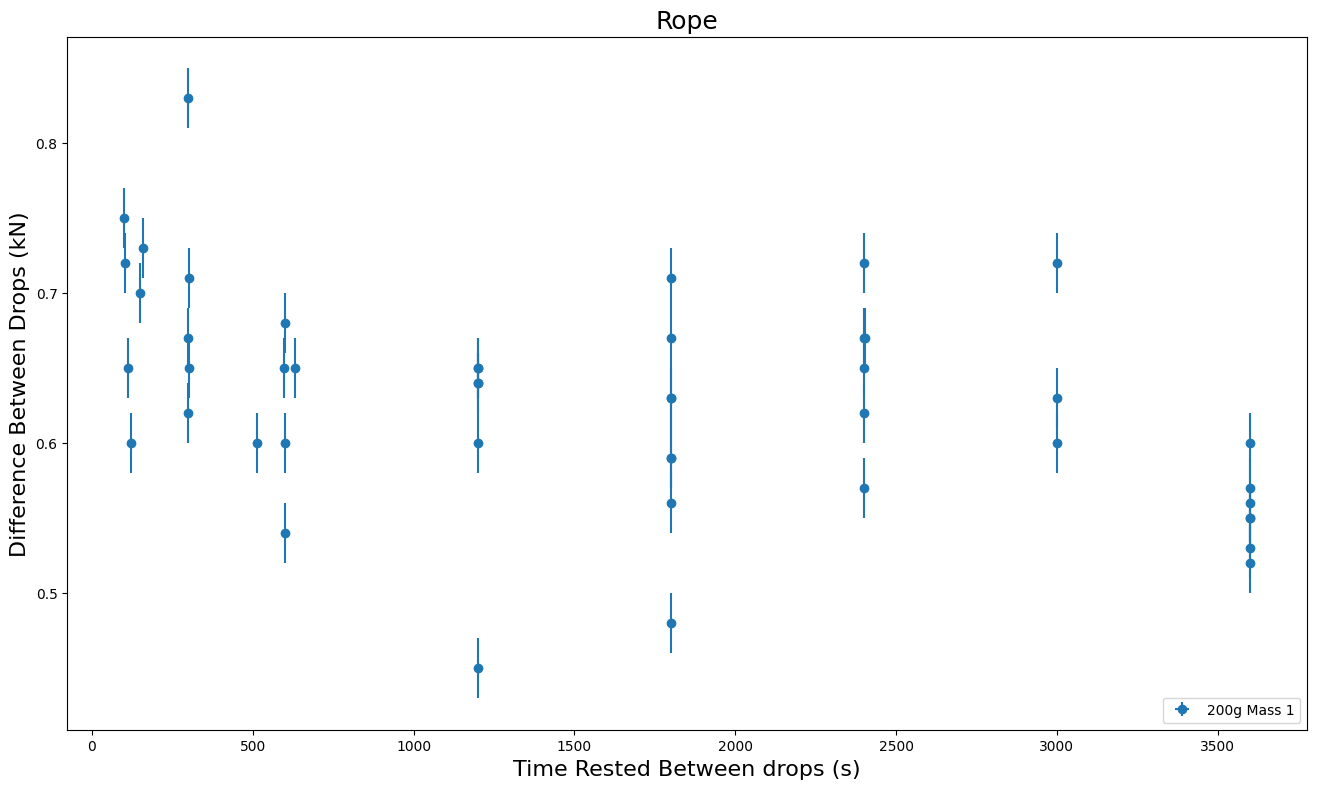

In [15]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = '200g Mass 1')
#p2 = ax.plot(SD202_df['Time'], SD202_df['Position'], color = 'black', label = '200g mass 2')
#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Rope', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

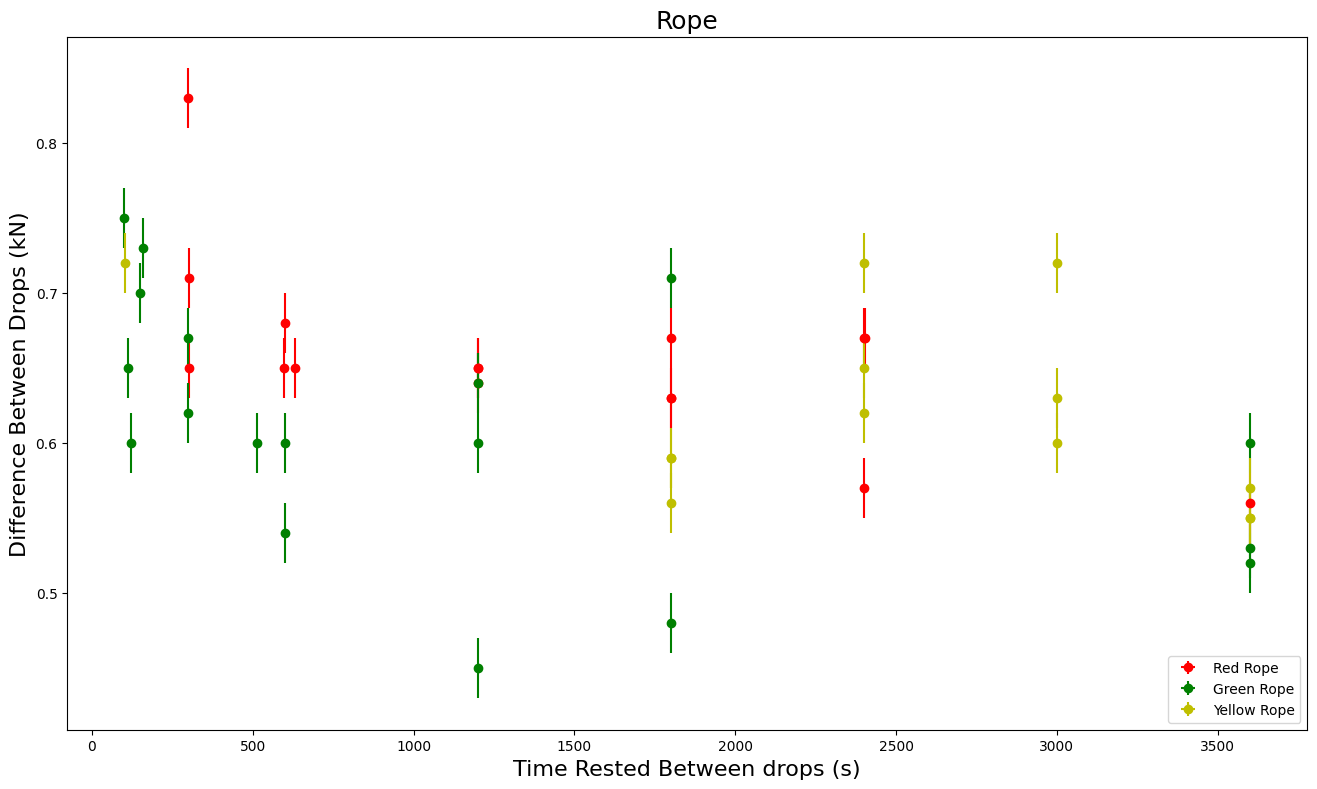

In [16]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Rope', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [17]:
# res is an object that contains:
    # res.slope = slope
    # res.intercept = intercept
    # res.rvalue = r
    # res.pvalue = p
    # res.stderr = slope standard error
    # res.intercept_stderr = intercept standard error
res = ss.linregress(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'])

print(f"slope =","{:.5f}".format(res.slope))
print(f"intercept =","{:.3f}".format(res.intercept))
print(f"r-sqrd =","{:.2}".format((res.rvalue)**2))
print(f"p-value null hyp =","{:.3}".format(res.pvalue))
print(f"slope std error =","{:.4}".format(res.stderr))
print(f"intercept std error =","{:.5}".format(res.intercept_stderr))

fit = res.slope*AllRopedf['T_Diff_Sec'] + res.intercept

slope = -0.00003
intercept = 0.672
r-sqrd = 0.19
p-value null hyp = 0.00196
slope std error = 8.066e-06
intercept std error = 0.016199


In [18]:
# SSE: sum of squared errors
SSE = np.sum((AllRopedf['kN_diff']-((res.slope*AllRopedf['T_Diff_Sec'])+res.intercept))**2)

# S_xy: sum of squares for x*y
S_xy = np.sum((AllRopedf['kN_diff']-np.mean(AllRopedf['kN_diff'])) * (AllRopedf['T_Diff_Sec']-np.mean(AllRopedf['T_Diff_Sec'])))

# S_xx: sum of squares for x*x
S_xx = np.sum((AllRopedf['T_Diff_Sec']-np.mean(AllRopedf['T_Diff_Sec']))**2)

In [19]:
# tinv is our two-sided inverse students t-distribution value
tinv = lambda p, df: abs(ss.t.ppf(p/2, df))

# for 95%, plug in 0.05
# for 68%, plug in 0.32
ts_95 = tinv(0.05, len(AllRopedf['T_Diff_Sec'])-2)
ts_68 = tinv(0.32, len(AllRopedf['T_Diff_Sec'])-2)

In [20]:
# slope 95% CI
slope_95CI = ts_95*res.stderr
print(f"slope =","{:.5f}".format(res.slope),"+/-","{:.5f}".format(slope_95CI))

# intercept 95% CI
inter_95CI = ts_95*res.intercept_stderr
print(f"intercept =","{:.3f}".format(res.intercept),"+/-","{:.3f}".format(inter_95CI))

slope = -0.00003 +/- 0.00002
intercept = 0.672 +/- 0.033


In [21]:
# S = standard deviation calculated from SSE
S = np.sqrt(SSE/(len(AllRopedf['T_Diff_Sec'])-2))

# Confidence Interval using 95% test statistic
CI_95 = ts_95*S*np.sqrt((1/len(AllRopedf['T_Diff_Sec']))+((AllRopedf['T_Diff_Sec'] - np.mean(AllRopedf['T_Diff_Sec']))**2)/S_xx)

# Prediction Interval using 68% test statistic
PI_68 = ts_68*S*np.sqrt(1+(1/len(AllRopedf['T_Diff_Sec']))+((AllRopedf['T_Diff_Sec'] - np.mean(AllRopedf['T_Diff_Sec']))**2)/S_xx)

In [ ]:
def exp(t, A_0, Damping_Constant):
  Avalue = A_0 * np.exp((-Damping_Constant*t)/2* 1379)
  return(Avalue)
  #At_top()

A= 0.12680948250029656 t= -0.0022923691039483706 y0= 0.604534798373316


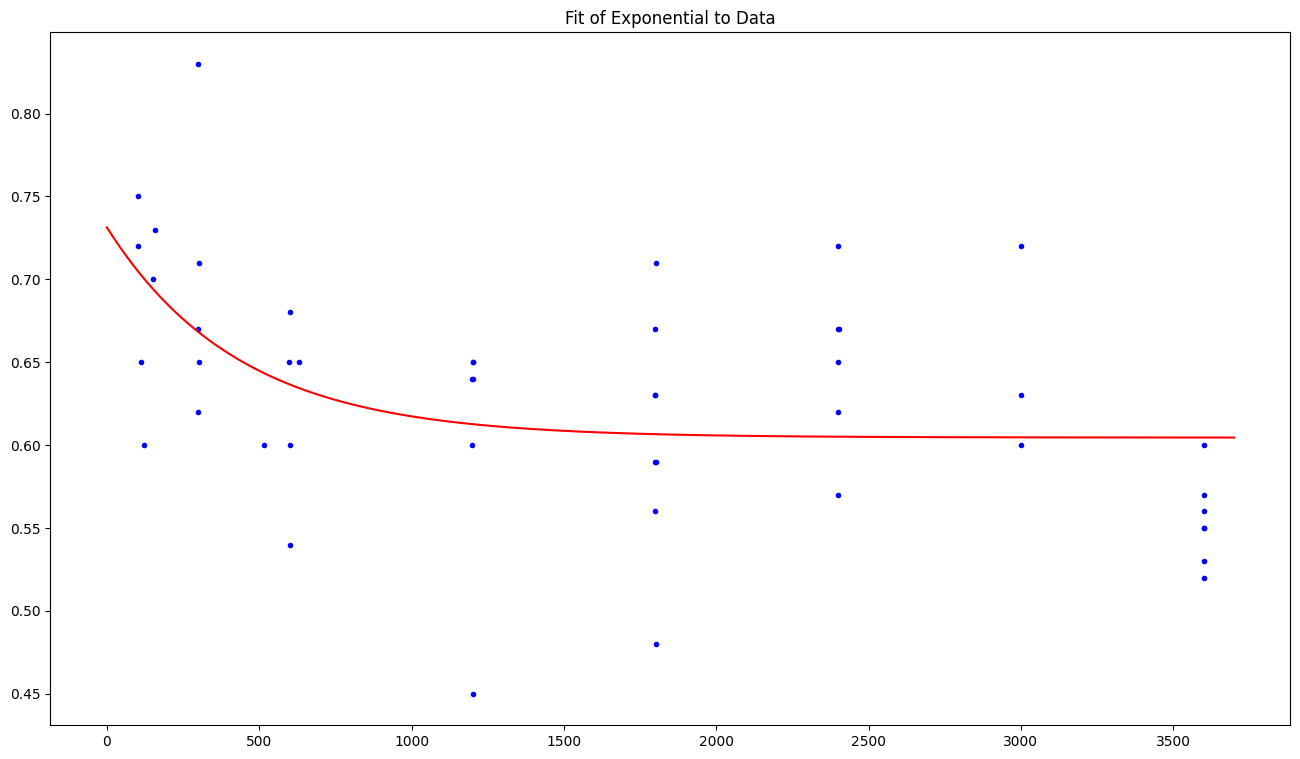

[[ 2.32715659e-03 -5.64624797e-05  3.75723900e-06]
 [-5.64624797e-05  3.05991042e-06 -1.37184219e-05]
 [ 3.75723900e-06 -1.37184219e-05  2.00982948e-04]]
parameter Error [0.04824061 0.00174926 0.01417685]


In [76]:

x =AllRopedf['T_Diff_Sec']
y = AllRopedf['kN_diff']

smoothx = np.linspace(0, 3700, 500)

guess_a, guess_b, guess_c = 4000, -0.005, 100
guess = [guess_a, guess_b, guess_c]

exp_decay = lambda x, A, t, y0: A * np.exp(x * t) + y0

params, cov = curve_fit(exp_decay, x, y, p0=guess)

A, t, y0 = params

#print("A = %s\nt = %s\ny0 = %s\n") % (A, t, y0)
print('A=',A, 't=',  t, 'y0=', y0)

pl.clf()
best_fit = lambda x: A * np.exp(t * x) + y0

pl.plot(x, y, 'b.')
pl.plot(smoothx, best_fit(smoothx), 'r-')
pl.title('Fit of Exponential to Data')
pl.show()
print(cov)
perr = np.sqrt(np.diag(cov))
print('parameter Error',perr)

In [24]:
avgvalarray = np.ones(len(AllRopedf['T_Diff_Sec']))*0.63 #array length AllRopedf at the average value of kN_diff
#b = [None] * 8 0.63

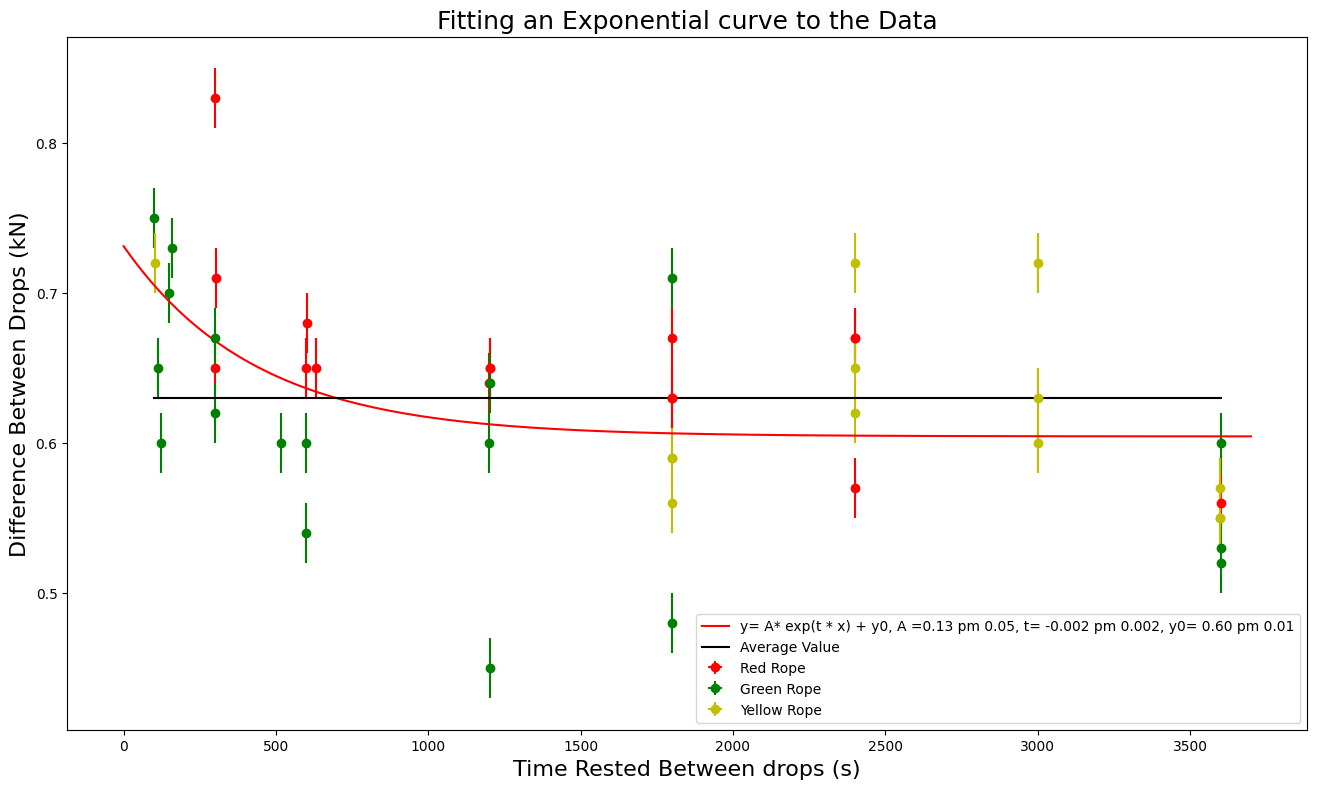

In [77]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
p4 = ax.plot(smoothx, best_fit(smoothx), 'r-', label = 'y= A* exp(t * x) + y0, A =0.13 pm 0.05, t= -0.002 pm 0.002, y0= 0.60 pm 0.01')
p5 = ax.plot(AllRopedf['T_Diff_Sec'], avgvalarray, color = 'black', label = 'Average Value' )
#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Fitting an Exponential curve to the Data', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [69]:
#attempt at logarithmic fit
logres = np.polyfit(np.log(AllRopedf['T_Diff_Sec']), AllRopedf['kN_diff'], 1)

print(logres)
logfit = logres[1]+logres[0]*np.log(AllRopedf['T_Diff_Sec'])

#attempt at exp fit
#exponfit = np.polyfit(np.exp(AllRopedf['T_Diff_Sec']), AllRopedf['kN_diff'], 1)

[-0.03054923  0.84117437]


In [23]:
#other attempt at log fitting
'''
x = AllRopedf['T_Diff_Sec']
y = AllRopedf['kN_diff']

x1 = [X for (X,Y) in sorted(zip(x,y))]
y1 = [Y for (X,Y) in sorted(zip(x,y))]
x=np.array(x1)
y=np.array(y1)
'''

# sorting values in order for log plotting
X = AllRopedf['T_Diff_Sec']
Y = AllRopedf['kN_diff']
x1 = [X for (X,Y) in sorted(zip(X,Y))]
y1 = [Y for (X,Y) in sorted(zip(X,Y))]
x=np.array(x1)
y=np.array(y1)

logres2 = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  x,  y)
print(logres2)




(array([ 0.84117436, -0.03054923]), array([[ 3.53905457e-03, -4.97134458e-04],
       [-4.97134458e-04,  7.16285636e-05]]))


##Plotting Fits

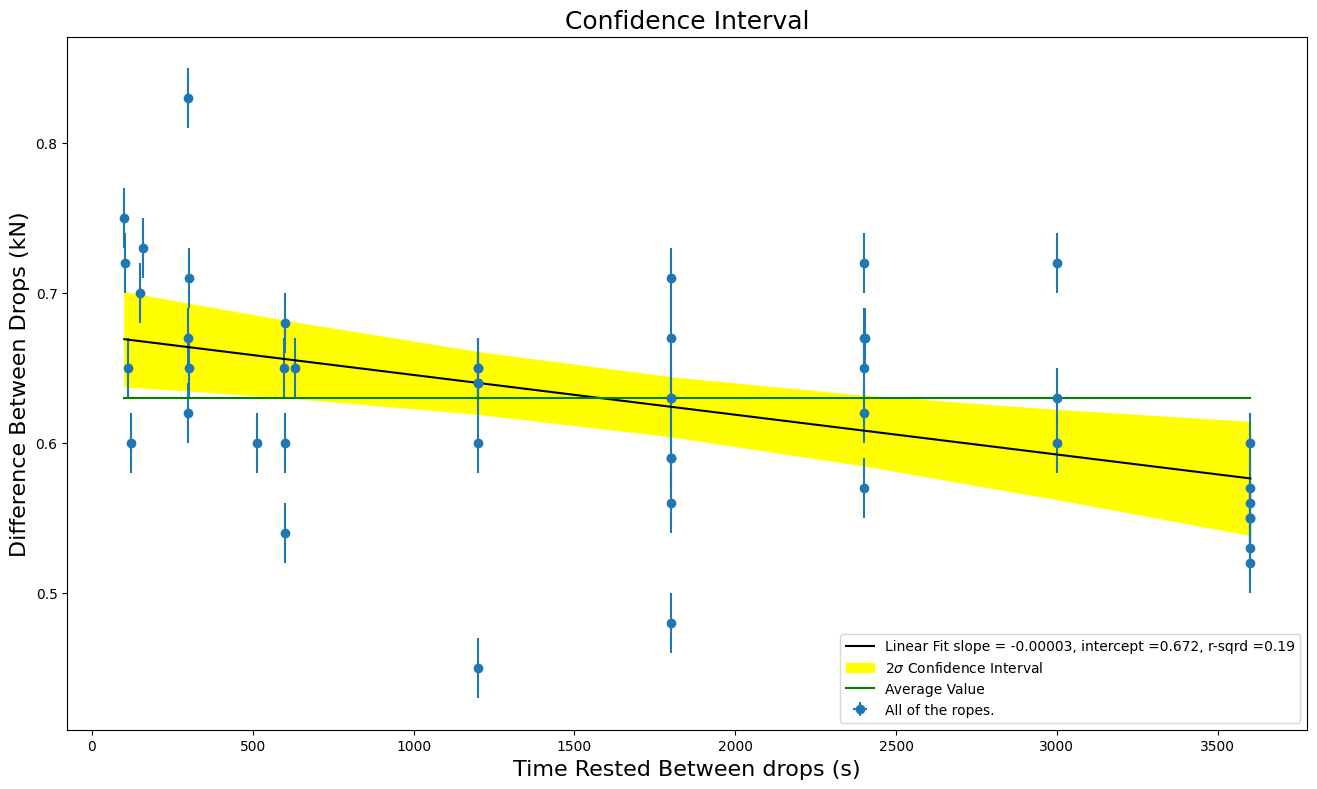

In [25]:
fig, ax = plt.subplots()
txt = 'black'
p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
p2 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
#p3 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ Prediction Interval')
p4 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ Confidence Interval')
p5 = ax.plot(AllRopedf['T_Diff_Sec'], avgvalarray, color = 'green', label = 'Average Value' )
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Confidence Interval', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

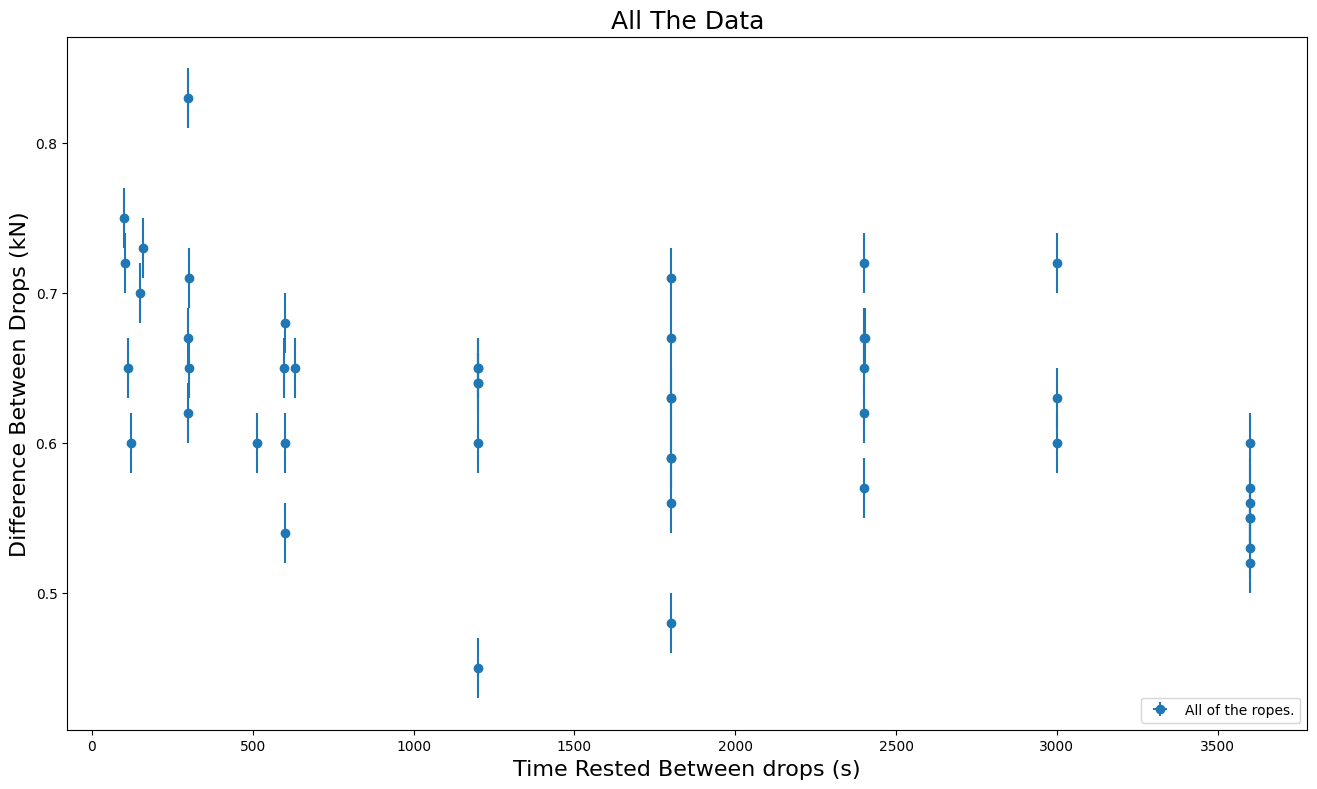

In [26]:
fig, ax = plt.subplots()
txt = 'black'
p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
#p2 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'All The Data', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

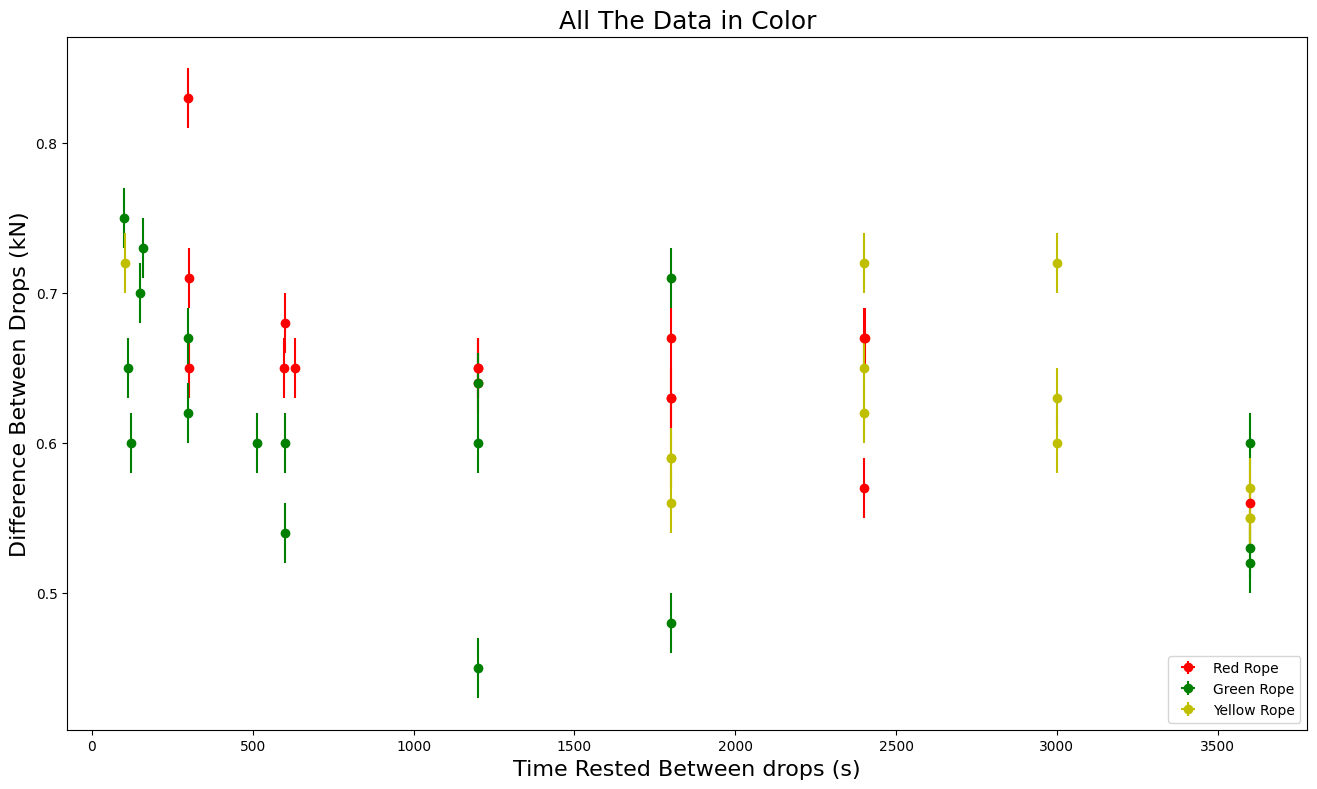

In [27]:
fig, ax = plt.subplots()
txt = 'black'
#p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
#p4 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
#p5 = ax.plot(AllRopedf['T_Diff_Sec'], logfit, color = 'red', label = 'Logarithmic Fit = {:.3} + {:.3} ln(x), r-sqrd ={:.2}'.format(logres[0],logres[1],0.225))



#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'All The Data in Color', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

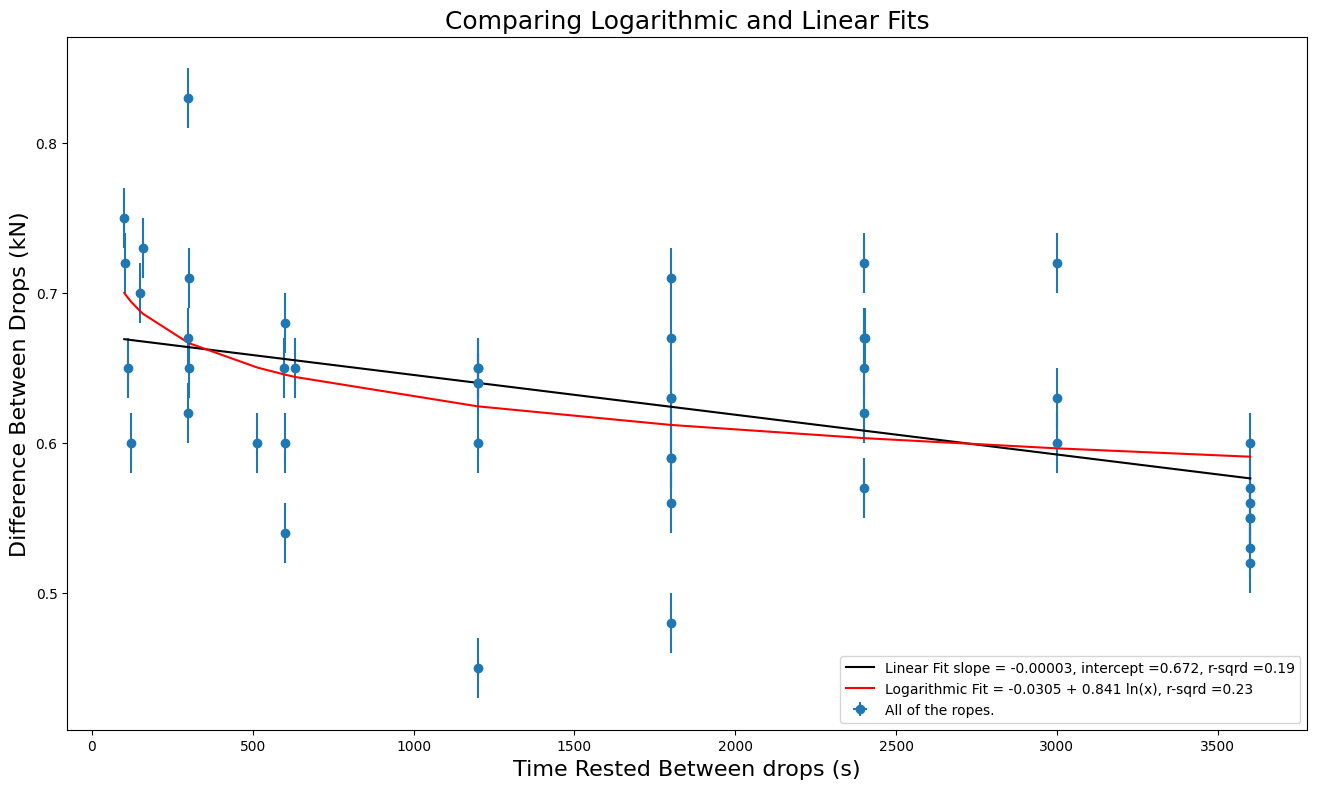

In [28]:
fig, ax = plt.subplots()
txt = 'black'
p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
#p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
#p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
#p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
p4 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
p5 = ax.plot(AllRopedf['T_Diff_Sec'], logfit, color = 'red', label = 'Logarithmic Fit = {:.3} + {:.3} ln(x), r-sqrd ={:.2}'.format(logres[0],logres[1],0.225))
#p6 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ Prediction Interval')
#p7 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ Confidence Interval')


#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Comparing Logarithmic and Linear Fits', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [ ]:
fig, ax = plt.subplots()
txt = 'black'
p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
#p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
#p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
#p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
p4 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
p5 = ax.plot(AllRopedf['T_Diff_Sec'], logfit, color = 'red', label = 'Logarithmic Fit = {:.3} + {:.3} ln(x), r-sqrd ={:.2}'.format(logres[0],logres[1],0.225))
#p6 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ Prediction Interval')
#p7 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ Confidence Interval')


#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Comparing Logarithmic and Linear Fits', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [29]:
# res is an object that contains:
    # res.slope = slope
    # res.intercept = intercept
    # res.rvalue = r
    # res.pvalue = p
    # res.stderr = slope standard error
    # res.intercept_stderr = intercept standard error
Red_res = ss.linregress(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'])
Red_fit = Red_res.slope*RedRopedf['T_Diff_Sec'] + Red_res.intercept

Green_res = ss.linregress(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'])
Green_fit = Green_res.slope*GreenRopedf['T_Diff_Sec'] + Green_res.intercept

Yellow_res = ss.linregress(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'])
Yellow_fit = Yellow_res.slope*YellowRopedf['T_Diff_Sec'] + Yellow_res.intercept

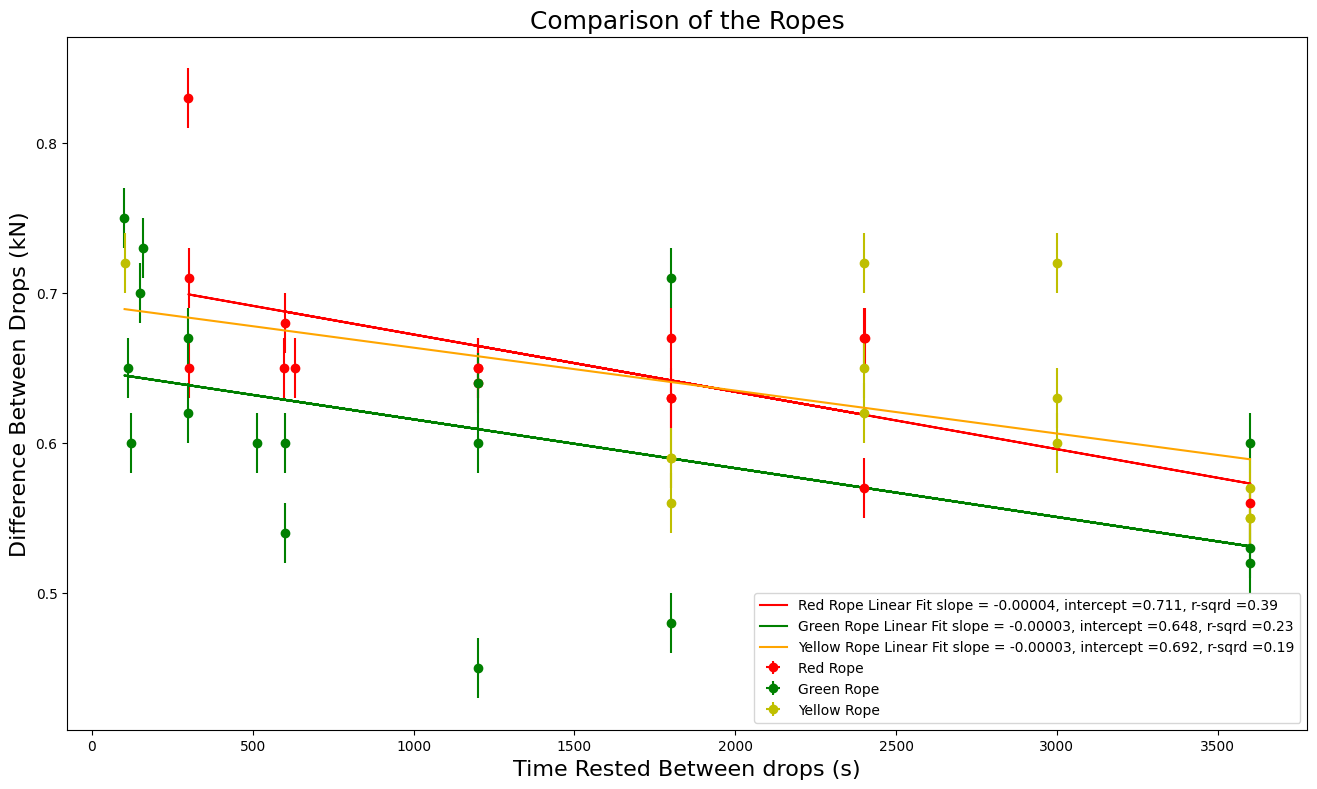

In [30]:
#Fitting each of the ropes individually


fig, ax = plt.subplots()
txt = 'black'
p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
p1f= ax.plot(RedRopedf['T_Diff_Sec'], Red_fit, color = 'red', label = 'Red Rope Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(Red_res.slope,Red_res.intercept,(Red_res.rvalue)**2))
p2f= ax.plot(GreenRopedf['T_Diff_Sec'], Green_fit, color = 'green', label = 'Green Rope Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(Green_res.slope,Green_res.intercept,(Green_res.rvalue)**2))
p3f= ax.plot(YellowRopedf['T_Diff_Sec'], Yellow_fit, color = 'orange', label = 'Yellow Rope Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(Yellow_res.slope,Yellow_res.intercept,(Yellow_res.rvalue)**2))




#p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Comparison of the Ropes', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

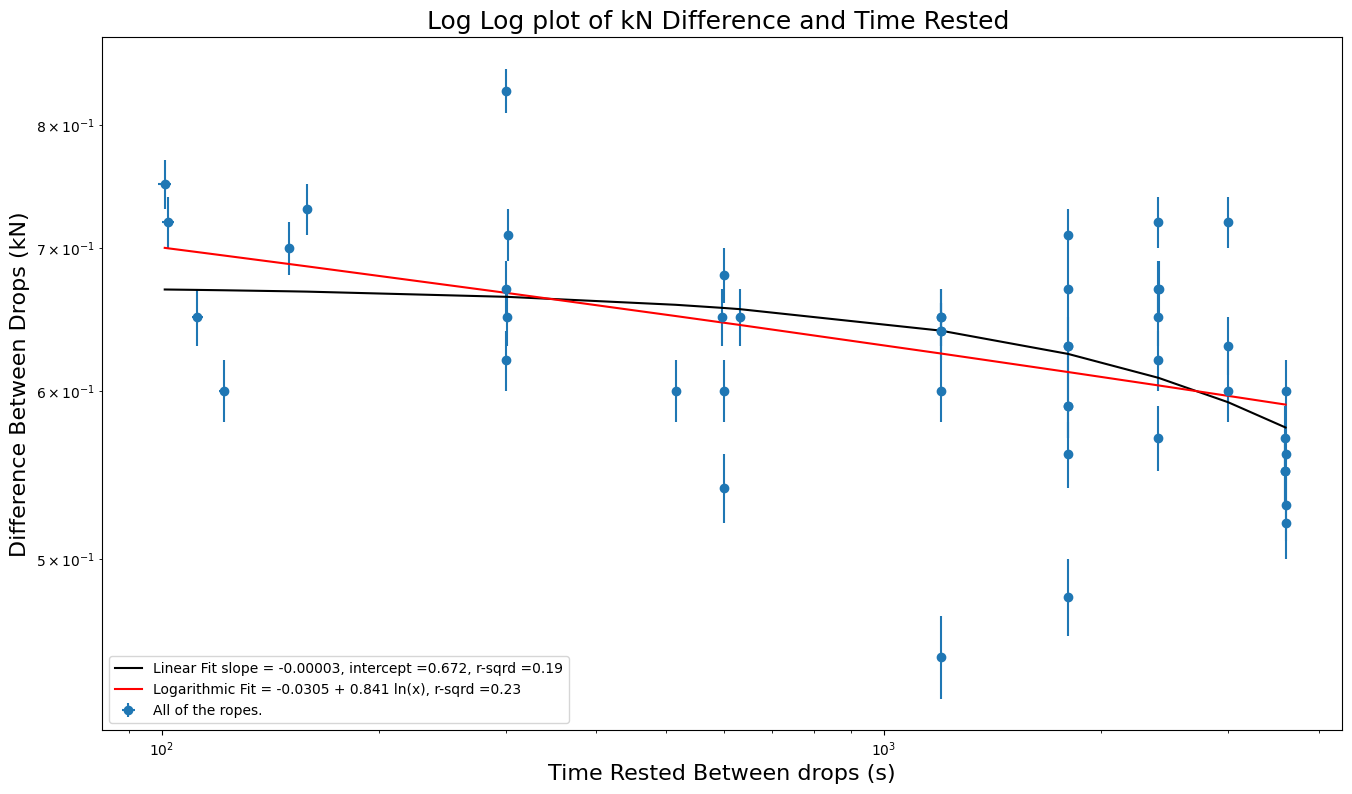

In [31]:
fig, ax = plt.subplots()
txt = 'black'
p0 = ax.errorbar(AllRopedf['T_Diff_Sec'], AllRopedf['kN_diff'], xerr =AllRopedf['T_Diff_Uncert'], yerr =AllRopedf['kN_diff_uncert'], fmt='o', label = 'All of the ropes.')
#p1 = ax.errorbar(RedRopedf['T_Diff_Sec'], RedRopedf['kN_diff'], xerr =RedRopedf['T_Diff_Uncert'], yerr =RedRopedf['kN_diff_uncert'], fmt='ro', label = 'Red Rope')
#p2 = ax.errorbar(GreenRopedf['T_Diff_Sec'], GreenRopedf['kN_diff'], xerr =GreenRopedf['T_Diff_Uncert'], yerr =GreenRopedf['kN_diff_uncert'], fmt='go', label = 'Green Rope')
#p3 = ax.errorbar(YellowRopedf['T_Diff_Sec'], YellowRopedf['kN_diff'], xerr =YellowRopedf['T_Diff_Uncert'], yerr =YellowRopedf['kN_diff_uncert'], fmt='yo', label = 'Yellow Rope')
p4 = ax.plot(AllRopedf['T_Diff_Sec'], fit, color = 'black', label = 'Linear Fit slope = {:.5f}, intercept ={:.3f}, r-sqrd ={:.2}'.format(res.slope,res.intercept,(res.rvalue)**2))
#p5 = ax.plot(AllRopedf['T_Diff_Sec'], logfit, color = 'red', label = 'Log Fit')
p5 = ax.plot(AllRopedf['T_Diff_Sec'], logfit, color = 'red', label = 'Logarithmic Fit = {:.3} + {:.3} ln(x), r-sqrd ={:.2}'.format(logres[0],logres[1],0.225))
#p6 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ Prediction Interval')
#p7 = ax.fill_between(AllRopedf['T_Diff_Sec'], fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ Confidence Interval')

ax.set_ylabel(r'Difference Between Drops (kN)', color=txt, fontsize=16)
ax.set_xlabel(r'Time Rested Between drops (s)', color=txt, fontsize=16)
ax.set_title(r'Log Log plot of kN Difference and Time Rested ', color=txt, fontsize = 18)
#ax.tick_params(axis='x', labelsize=16, colors=txt)
#ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='lower left')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

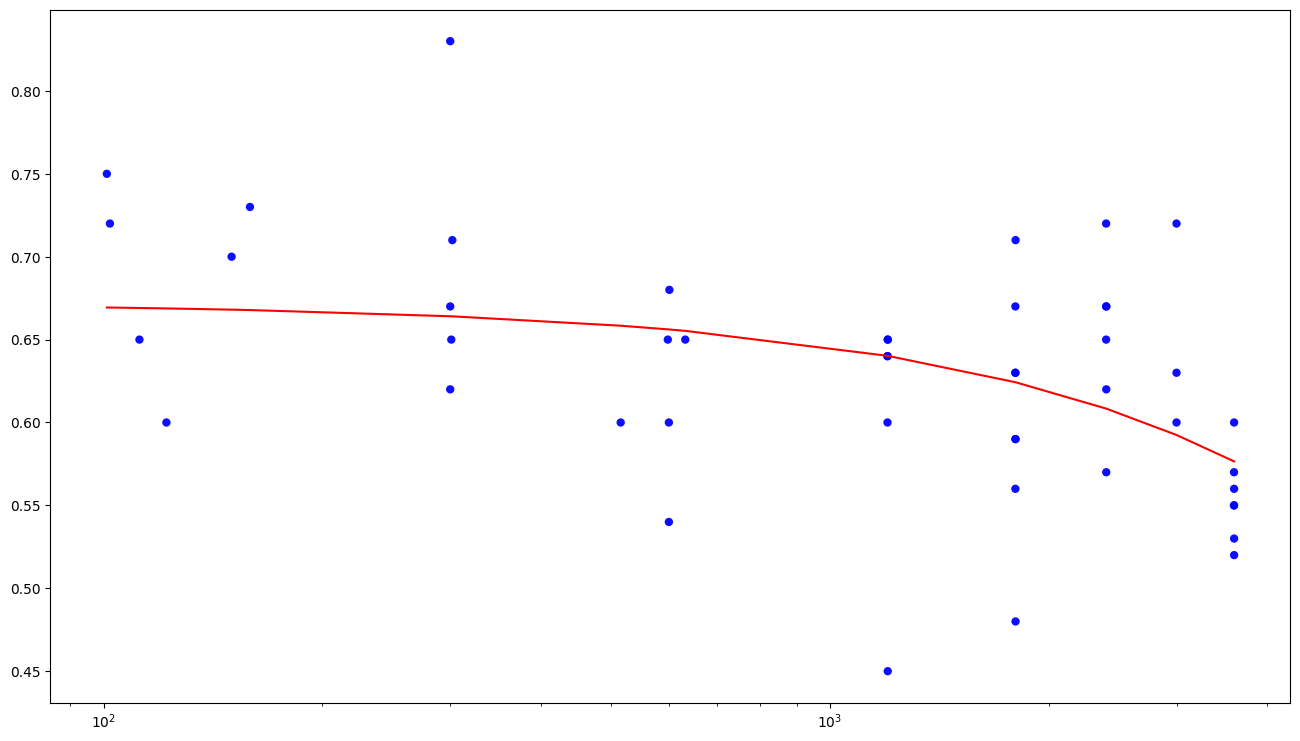

In [32]:
#log Log plot from
#https://stackoverflow.com/questions/32536226/log-log-plot-linear-regression

x1 = [X for (X,Y) in sorted(zip(x,y))]
y1 = [Y for (X,Y) in sorted(zip(x,y))]
x=np.array(x1)
y=np.array(y1)

fig = plt.figure()
ax=plt.gca() #get current axes
logfit3 = np.polyfit(x, y, deg=1)
#fit = np.logfit(x, y)
ax.plot(x, logfit3[0] *x + logfit3[1], color='red') # add reg line
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none')
#ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

#Reading Data from CSV:


In [33]:
'''
#Our Google Sheets Data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gMOonTRPUaZKMfLniSEQXKWGqH9r9gX3rauro1MZO7U/edit?usp=sharing')

#Specifies which tab of the sheets file to get data
sheet2019 = wb.worksheet('2019')

#Gets the data from the tab
data2019 = sheet2019.get_all_values()

#prints the first 5 rows of the DataFrame
#df.head()
#'''

"\n#Our Google Sheets Data\nwb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gMOonTRPUaZKMfLniSEQXKWGqH9r9gX3rauro1MZO7U/edit?usp=sharing')\n\n#Specifies which tab of the sheets file to get data\nsheet2019 = wb.worksheet('2019')\n\n#Gets the data from the tab\ndata2019 = sheet2019.get_all_values()\n\n#prints the first 5 rows of the DataFrame\n#df.head()\n#"

In [34]:

#path_to_data_example = '/content/gdrive/My Drive/MyFolder_where_data_stored' Unique_Labels_List = os.listdir(path_to_data)
path_to_data = '/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest'
Folder_Labels_List = os.listdir(path_to_data)
print(Folder_Labels_List)



['22_12_23', '22_12_13', '22_12_16']


First 13 rows are just info about the Data Capture.

In [35]:

#New CSV Read:
#df = pd.read_csv('13_43_47.CSV') #old when file directly imported to Colab
df1 = pd.read_csv('/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest/22_12_13/13_43_47.CSV') # pull test by hand
#df2 = pd.read_csv('16_02_27.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest/22_12_16/16_02_27.CSV')
#df3 = pd.read_csv('16_02_51.csv')
df3 = pd.read_csv('/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest/22_12_16/16_02_51.CSV')
#df4 = pd.read_csv('13_50_50.CSV')
df4 = pd.read_csv('/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest/22_12_23/13_33_05.CSV')
df5 = pd.read_csv('/content/gdrive/MyDrive/Nowatka_Physics_Thesis/LS14D128pretest/22_12_23/13_50_50.CSV')
#print(df.to_string())



note to self

df2 = df2.iloc[13:] #Removes header info from data.

will delete those rows and runtime or whatever will have to be restarted.

In [36]:
#prints the first () in this case 13 rows of the DataFrame
df1.head(13)

,14:D1:28
0,13.12.22
1,13:43:47
2,LogNo=001
3,Unit=kN
4,Mode=ABS
5,RelZero=n/a
6,Speed=1280
7,Trig=0.10
8,Stop=0.00
9,Pre=3


In [37]:
df1['14:D1:28'].loc[6]

print(df1['14:D1:28'].loc[6])

Speed=1280


In [38]:

#df1['14:D1:28'].loc

filter_speed = ['Speed']
df1[df1['14:D1:28'].isin(filter_speed)].index

#print(df1.index[6])

Int64Index([], dtype='int64')

In [39]:
#df2.head(13)

In [40]:
#df3.head(13)

In [41]:
#df4.head(13)

In [42]:
#df5.head(13)

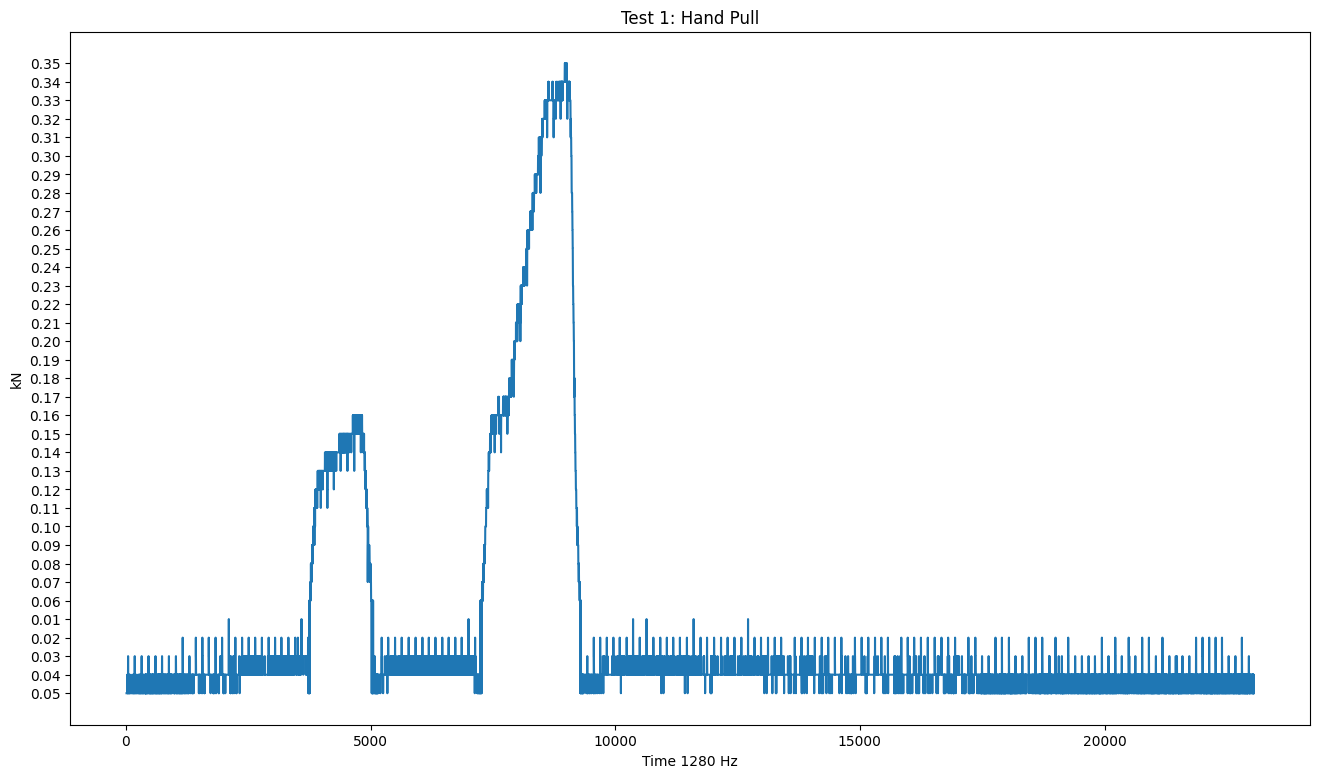

In [43]:
y = df1.iloc[13:] #Removes header info from data.
y = y['14:D1:28']
#x = np.len[y]
plt.plot(y)
plt.title('Test 1: Hand Pull')
plt.xlabel('Time 1280 Hz')
plt.ylabel('kN')
#plt.yticks(np.arange(0, 1, 0.05))
#plt.yticks(np.arange(0.00, 1.00, 0.05))
plt.show()

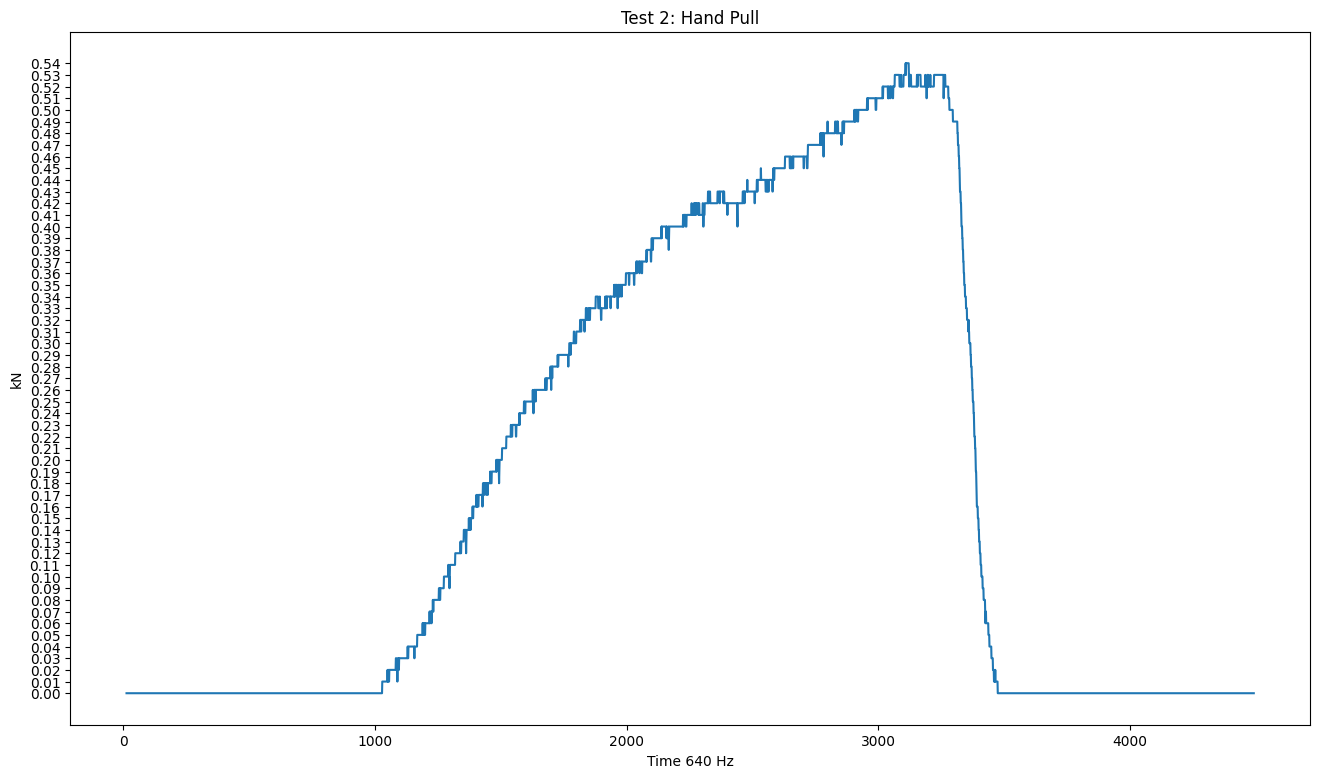

In [44]:
y = df2.iloc[13:] #Removes header info from data.
y = y['14:D1:28']
#x = np.len[y]
plt.plot(y)
plt.title('Test 2: Hand Pull')
plt.xlabel('Time 640 Hz')
plt.ylabel('kN')
#plt.yticks(np.arange(0, 1, 0.05))
#plt.yticks(np.arange(0.00, 1.00, 0.05))
plt.show()

#Attempt to do maxes and mins:

In [45]:
'''
df2 = df2.iloc[13:]
df2.data = df2['14:D1:28']
df2['min'] = df2.data[(df2.data.shift(1) > df2.data) & (df2.data.shift(-1) > df2.data)]
df2['max'] = df2.data[(df2.data.shift(1) < df2.data) & (df2.data.shift(-1) < df2.data)]

# Plot results
plt.title('')
plt.xlabel('Time 1280 Hz')
plt.ylabel('kN')
plt.scatter(df2.index, df2['min'], c='r')
plt.scatter(df2.index, df2['max'], c='g')
#df2.data.plot()
'''

"\ndf2 = df2.iloc[13:]\ndf2.data = df2['14:D1:28']\ndf2['min'] = df2.data[(df2.data.shift(1) > df2.data) & (df2.data.shift(-1) > df2.data)]\ndf2['max'] = df2.data[(df2.data.shift(1) < df2.data) & (df2.data.shift(-1) < df2.data)]\n\n# Plot results\nplt.title('')\nplt.xlabel('Time 1280 Hz')\nplt.ylabel('kN')\nplt.scatter(df2.index, df2['min'], c='r')\nplt.scatter(df2.index, df2['max'], c='g')\n#df2.data.plot()\n"

In [46]:
'''
n = 5  # number of points to be checked before and after
# Find local peaks

df2['min'] = df2.iloc[argrelextrema(df2.values, np.less_equal,order=n)[0]]['14:D1:28']
#df2['max'] = df2.iloc[argrelextrema(df2.'14:D1:28'.values, np.greater_equal,
#                    order=n)[0]]['14:D1:28']

# Plot results

plt.scatter(df2.index, df2['min'], c='r')
#plt.scatter(df2.index, df2['max'], c='g')
plt.plot(df2.index, df2['data'])
plt.show()
'''

"\nn = 5  # number of points to be checked before and after\n# Find local peaks\n\ndf2['min'] = df2.iloc[argrelextrema(df2.values, np.less_equal,order=n)[0]]['14:D1:28']\n#df2['max'] = df2.iloc[argrelextrema(df2.'14:D1:28'.values, np.greater_equal,\n#                    order=n)[0]]['14:D1:28']\n\n# Plot results\n\nplt.scatter(df2.index, df2['min'], c='r')\n#plt.scatter(df2.index, df2['max'], c='g')\nplt.plot(df2.index, df2['data'])\nplt.show()\n"

#Test 3

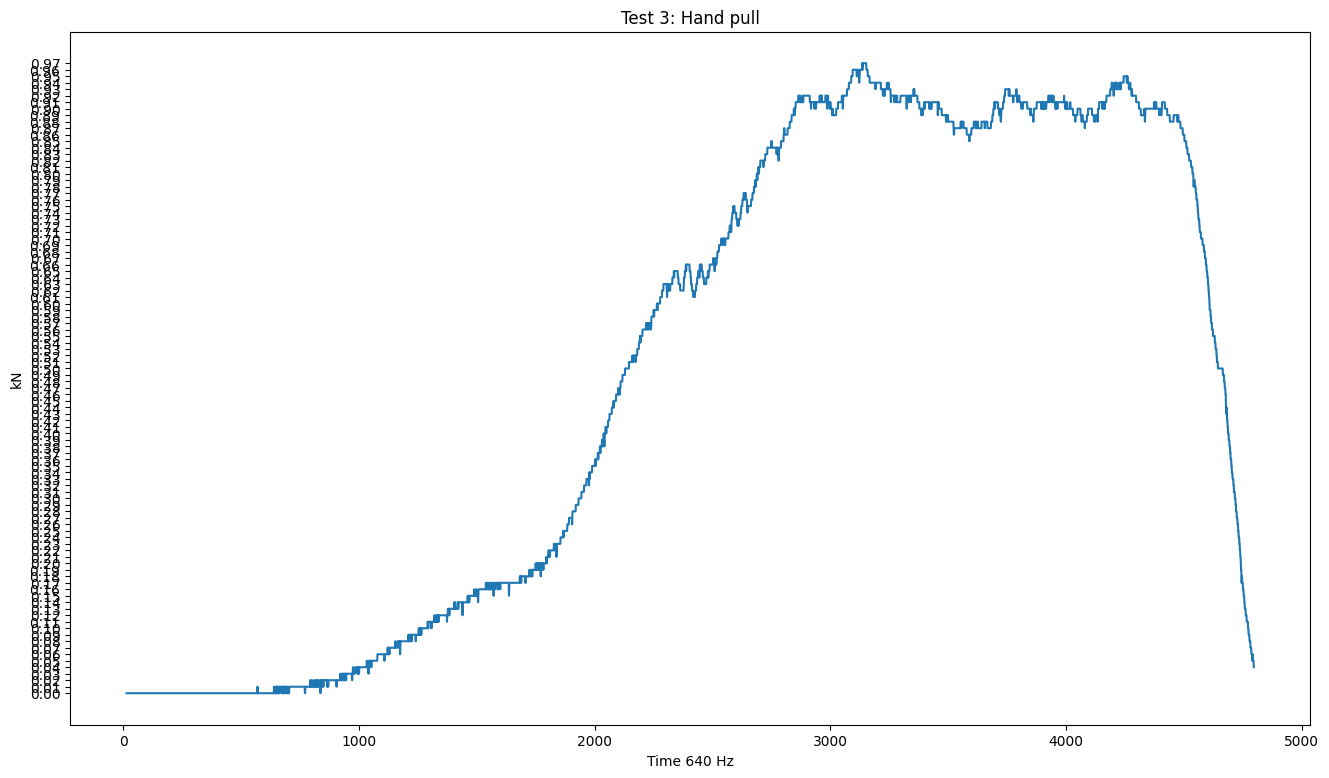

In [47]:
y = df3.iloc[13:] #Removes header info from data.
y = y['14:D1:28']
#x = np.len[y]
plt.plot(y)
plt.title('Test 3: Hand pull')
plt.xlabel('Time 640 Hz')
plt.ylabel('kN')
#plt.yticks(np.arange(0, 1, 0.05))
#plt.yticks(np.arange(0.00, 1.00, 0.05))
plt.show()

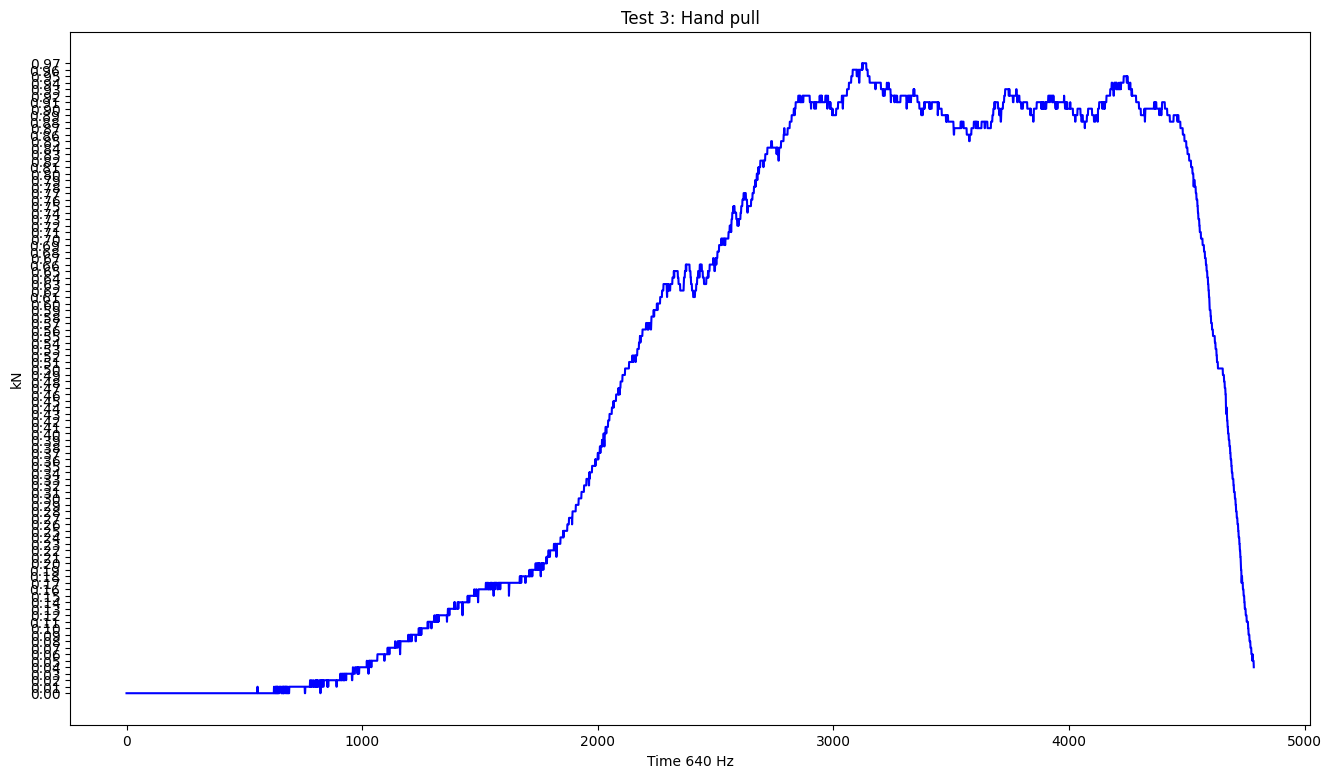

In [48]:
#Will's suggestion
y = df3.iloc[13:] #Removes header info from data.
y = y['14:D1:28']
#x = np.len[y]
plt.plot(np.arange(0,len(y)),y,'b-')
plt.title('Test 3: Hand pull')
plt.xlabel('Time 640 Hz')
plt.ylabel('kN')
#plt.yticks(np.arange(0, 1, 0.05))
#plt.yticks(np.arange(0.00, 1.00, 0.05))
plt.show()

#Actual Drop tests:

In [49]:
'''
y = df5['14:D1:28']
sample_rate = y.loc[6]
print(sample_rate)
'''

"\ny = df5['14:D1:28']\nsample_rate = y.loc[6]\nprint(sample_rate)\n"

#Fixing Graphs:


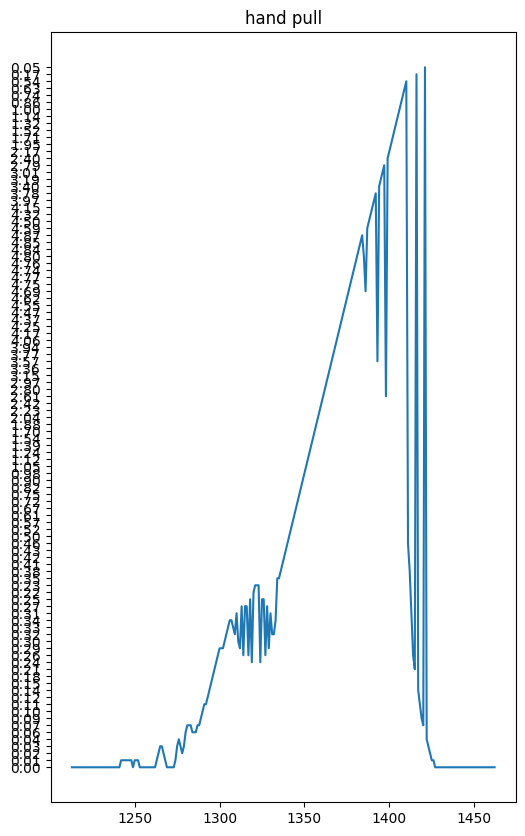

In [50]:
fig, ax = plt.subplots()

y = df5['14:D1:28']
#sample_rate = y.loc[6]
#force_unit = y.loc[3]
#y = y.iloc[13:] #Removes header info from data.
sample_rate = y[6]
force_unit = y[3]
y = y[13:] #Removes header info from data.

#y = y['14:D1:28']
#x = np.len[y]

#ax.plot(y.iloc[1200:1450])
ax.plot(y[1200:1450])
plt.title('hand pull')
#plt.xlabel('Time 640 Hz')
#plt.xlabel(sample_rate)
#plt.ylabel(force_unit)
#ax.xaxis.set_major_locator(xmajor_locator)
#ax.xaxis.set_minor_locator(xminor_locator)
#ticker.MultipleLocator(0.5)
#tick_spacing = 10

#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#ax.yaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing))
#ax.yaxis.set_minor_locator(0.5)
#ax.yaxis.set_[minor|major]_locator(locator)


#plt.yticks(np.arange(0, 1, 0.05))
#plt.yticks(np.arange(0.00, 1.00, 0.05))


fig.set_size_inches(6, 10)
#fig.savefig(“figure.pdf”)
fig.show()

#plt.show()

In [51]:
df5_peaks = peakfinder(y[1200:1450])
print(df5_peaks)

   Peak  PeakHeight
0    32        0.01
1    38        0.01
2    52        0.03
3    63        0.04
4    69        0.07
5    93        0.34
6   102        0.27
7   165        4.77
8   171        4.87
